Prueba.-Ejercicio Diamantes 

https://www.kaggle.com/c/thebridgediamonds

kaggle.comkaggle.com
Diamantes
Prediccion del precio de los diamantes.


La metrica es la RMSE.
Bajar datos
Train dividir en train y test
limpiar/transformar
modelo de ML
solución. Se pueden mandar 5 al dia.

In [1]:
#!pip install category_encoders

In [2]:
# Librerias habituales
import pandas as pd
import numpy as np

import pylab as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

import category_encoders as ce

import warnings
warnings.simplefilter('ignore')

In [3]:
# carga de datos
df_diamantes = pd.read_csv(r'C:\Users\ragod\OneDrive\Escritorio\Proyectos_TB\Proyectos_TB\Diamantes\train.csv')
df_diamantes_prediccion =pd.read_csv(r'C:\Users\ragod\OneDrive\Escritorio\Proyectos_TB\Proyectos_TB\Diamantes\test.csv ')


In [4]:
df_diamantes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35940 entries, 0 to 35939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    35940 non-null  float64
 1   cut      35940 non-null  object 
 2   color    35940 non-null  object 
 3   clarity  35940 non-null  object 
 4   depth    35940 non-null  float64
 5   table    35940 non-null  float64
 6   price    35940 non-null  float64
 7   x        35940 non-null  float64
 8   y        35940 non-null  float64
 9   z        35940 non-null  float64
 10  id       35940 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 3.0+ MB


In [5]:
dim_ini =[df_diamantes.shape]
dim_ini

[(35940, 11)]

In [6]:
df_diamantes.describe()

,carat,depth,table,price,x,y,z,id
count,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000
mean,0.907500,61.756210,57.461753,3930.117835,5.728928,5.731430,3.537112,17969.500000
std,2.098015,1.431872,2.240414,3982.706797,1.121504,1.121685,0.695298,10375.128674
min,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,949.000000,4.710000,4.720000,2.910000,8984.750000
50%,0.700000,61.900000,57.000000,2394.000000,5.690000,5.710000,3.520000,17969.500000
75%,1.050000,62.500000,59.000000,5362.250000,6.540000,6.540000,4.040000,26954.250000
max,49.990359,79.000000,95.000000,18823.000000,10.230000,31.800000,6.720000,35939.000000


In [7]:
#Las variables que influeyen en el presio son: carat, clarity, colour y cut. Transformamos las variables categoricas:
#cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
#color diamond colour, from J (worst) to D (best)
#clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))



In [8]:
#buscamos los valores de las variables categoricas
v_colors =[df_diamantes['color'].unique()]
v_cut = [df_diamantes['cut'].unique()]
v_clarity = [df_diamantes['clarity'].unique()]

v_colors, v_cut, v_clarity

([array(['F', 'I', 'E', 'G', 'H', 'J', 'D'], dtype=object)],
 [array(['Very Good', 'Ideal', 'Good', 'Premium', 'Very Geod', 'Fair'],
        dtype=object)],
 [array(['SI2', 'VS2', 'VVS2', 'IF', 'SI1', 'VVS1', 'VS1', 'I1'],
        dtype=object)])

In [9]:
#Correcion de error tipografico
df_diamantes.loc[(df_diamantes['cut'] == 'Very Geod'),'cut']='Very Good'


In [10]:
#Comprobacion de la corrección
v_cut = [df_diamantes['cut'].unique()]
v_cut

[array(['Very Good', 'Ideal', 'Good', 'Premium', 'Fair'], dtype=object)]

In [11]:
#creamos un dccionario para codificar las variables categoricas.
#Los valores se asignan según enunciado. Minimmo valor = 1, Maximo valor =num maximo de valores
#Column cut:Fair, Good, Very Good, Premium, Ideal
# Column colour, from J (worst), I,H,G,F,E D (best)
# Column clirity :I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
codificacion = [{'col':'cut','mapping':{'Very Good':3, 'Ideal':5, 'Good':2, 'Premium':4, 'Fair':1}},
                {'col' :'color', 'mapping':{'F':5, 'I':2, 'E':6, 'G':4, 'H':3, 'J':1, 'D':7}},
                {'col' : 'clarity', 'mapping':{'SI2':2, 'VS2':4, 'VVS2':6, 'IF':8, 'SI1':3, 'VVS1':7, 'VS1':5, 'I1':1}}]

In [12]:
#Aplicamos la transformación  a las variables catgeoricas
encoder = ce.OrdinalEncoder(cols = ['cut','color','clarity'], mapping= codificacion)

df_encoded =encoder.fit_transform(df_diamantes)


In [13]:
#Comprobacion de la transformacion
v_colors =[df_encoded['color'].unique()]
v_cut = [df_encoded['cut'].unique()]
v_clarity = [df_encoded['clarity'].unique()]

v_colors, v_cut, v_clarity

([array([5, 2, 6, 4, 3, 1, 7])],
 [array([3, 5, 2, 4, 1])],
 [array([2, 4, 6, 8, 3, 7, 5, 1])])

In [14]:
df_encoded.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,id
count,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000
mean,0.907500,3.904897,4.396272,4.058932,61.756210,57.461753,3930.117835,5.728928,5.731430,3.537112,17969.500000
std,2.098015,1.115906,1.699530,1.648053,1.431872,2.240414,3982.706797,1.121504,1.121685,0.695298,10375.128674
min,0.200000,1.000000,1.000000,1.000000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.100000,56.000000,949.000000,4.710000,4.720000,2.910000,8984.750000
50%,0.700000,4.000000,4.000000,4.000000,61.900000,57.000000,2394.000000,5.690000,5.710000,3.520000,17969.500000
75%,1.050000,5.000000,6.000000,5.000000,62.500000,59.000000,5362.250000,6.540000,6.540000,4.040000,26954.250000
max,49.990359,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.230000,31.800000,6.720000,35939.000000


In [15]:
#Comprobacion duplicados

df_encoded[df_encoded.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z,id


<AxesSubplot:>

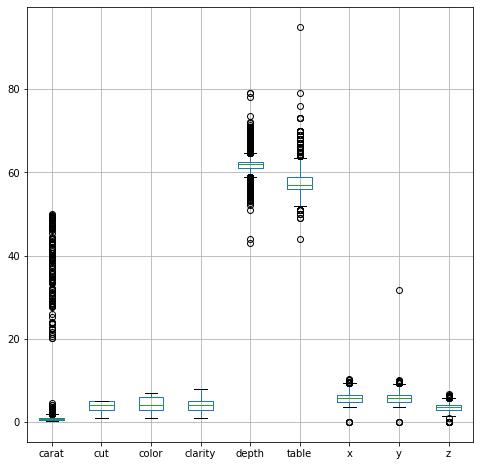

In [16]:
plt.figure(figsize=(8,8))
df_encoded.boxplot(['carat','cut','color', 'clarity','depth','table','x','y','z'])

<AxesSubplot:>

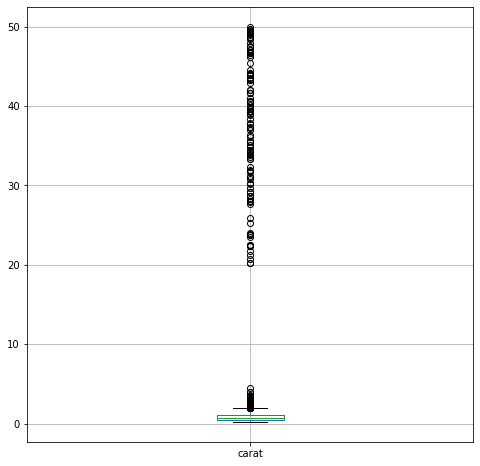

In [17]:
plt.figure(figsize=(8,8))
df_encoded.boxplot('carat')

In [18]:
#Analisis de outlier carat. Se determinan como outliers los superiores a 10.
outlier1 = df_encoded[df_encoded['carat'] >10]

In [19]:
clean_index=[i for i in df_encoded.index if i not in outlier1.index] 

In [20]:
df=df_encoded.iloc[clean_index]  # selecciona en el df esos indices, los que NO son outliers
df.reset_index(inplace=True, drop=True)
df.shape

(35830, 11)

<AxesSubplot:>

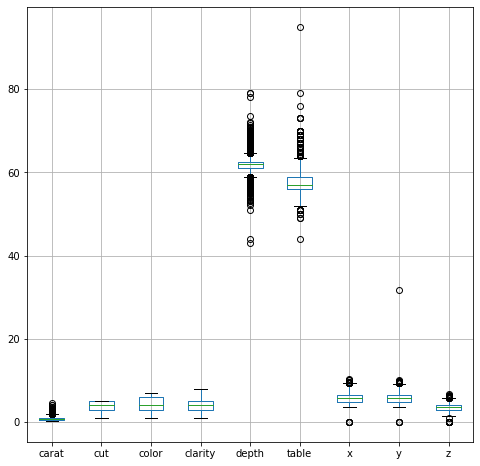

In [21]:
plt.figure(figsize=(8,8))
df.boxplot(['carat','cut','color', 'clarity','depth','table','x','y','z'])

In [22]:
#************* Busqueda ourliers

In [23]:
df_encoded3 = df.drop(['id','carat','price'],axis=1)


In [24]:





stats=df_encoded3.describe().T

stats['IQR']=stats['75%'] - stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
cut,35830.0,3.904773,1.115420,1.0,3.00,4.00,5.00,5.00,2.00
color,35830.0,4.396511,1.699589,1.0,3.00,4.00,6.00,7.00,3.00
clarity,35830.0,4.058443,1.648080,1.0,3.00,4.00,5.00,8.00,2.00
depth,35830.0,61.756068,1.431242,43.0,61.10,61.90,62.50,79.00,1.40
table,35830.0,57.462012,2.240643,44.0,56.00,57.00,59.00,95.00,3.00
x,35830.0,5.729133,1.121617,0.0,4.71,5.69,6.54,10.23,1.83
y,35830.0,5.731629,1.121802,0.0,4.72,5.71,6.54,31.80,1.82
z,35830.0,3.537347,0.695115,0.0,2.91,3.52,4.04,6.72,1.13


In [25]:
outliers=pd.DataFrame(columns=df.columns)

outliers
stats.index[0]

'cut'

In [26]:

for e in stats.index:
    
    iqr=stats.at[e, 'IQR']
    
    cutoff=1.5*iqr
    
    lower=stats.at[e, '25%']-cutoff
    upper=stats.at[e, '75%']+cutoff
    
    results=df[(df[e]<lower) | (df[e]>upper)].copy()
    
    results['outliers']=e
    outliers=outliers.append(results, sort=True)
    
outliers['outliers'].value_counts()

depth    1978
table     412
z          30
x          20
y          17
Name: outliers, dtype: int64

In [27]:
outliers.head()

,carat,clarity,color,cut,depth,id,outliers,price,table,x,y,z
11,1.01,4,5,3,58.8,11,depth,6288.0,59.0,6.55,6.59,3.86
37,0.52,6,6,1,57.2,37,depth,2079.0,64.0,5.27,5.36,3.04
59,1.02,5,4,2,57.3,59,depth,5706.0,59.0,6.71,6.65,3.83
62,1.51,4,7,1,66.0,62,depth,15152.0,57.0,7.17,7.08,4.70
105,0.91,4,7,1,65.1,106,depth,4439.0,63.0,6.02,6.00,3.91


In [28]:
clean_index=[i for i in df.index if i not in outliers.index]  # selecciono los indices del df que no estan en outliers

len(clean_index)

33577

In [29]:
df=df.iloc[clean_index]  # selecciona en el df esos indices, los que NO son outliers
df.reset_index(inplace=True, drop=True)
df.shape

(33577, 11)

In [30]:
#separacion de datos
from sklearn.model_selection import train_test_split as tts
X = df.drop(columns=['price','id'])._get_numeric_data()  # datos

y = df.price  # objetivo

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)



In [31]:
X_test.shape, y_test.shape

((6716, 9), (6716,))

In [32]:
Nom_columns =[X_train.columns]
Nom_columns

[Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')]

In [33]:
#normalziacion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
X_train =StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns= Nom_columns)


In [34]:
X_test =StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns= Nom_columns)

In [35]:
X_test.shape, y_test.shape

((6716, 9), (6716,))

In [36]:
#correacion
X_train.corr()

,carat,cut,color,clarity,depth,table,x,y,z
carat,1.000000,-0.110699,-0.287112,-0.342333,0.026075,0.192941,0.980204,0.979448,0.978845
cut,-0.110699,1.000000,0.015357,0.166087,-0.283194,-0.406336,-0.099709,-0.103294,-0.127308
color,-0.287112,0.015357,1.000000,-0.030355,-0.047899,-0.031314,-0.265723,-0.265686,-0.268835
clarity,-0.342333,0.166087,-0.030355,1.000000,-0.069244,-0.162970,-0.361429,-0.356816,-0.364021
depth,0.026075,-0.283194,-0.047899,-0.069244,1.000000,-0.230057,-0.012749,-0.014405,0.078576
table,0.192941,-0.406336,-0.031314,-0.162970,-0.230057,1.000000,0.196811,0.191970,0.173980
x,0.980204,-0.099709,-0.265723,-0.361429,-0.012749,0.196811,1.000000,0.998855,0.994432
y,0.979448,-0.103294,-0.265686,-0.356816,-0.014405,0.191970,0.998855,1.000000,0.994211
z,0.978845,-0.127308,-0.268835,-0.364021,0.078576,0.173980,0.994432,0.994211,1.000000


In [37]:
# criterio de colinealidad

colineales=[]

for c in X_train._get_numeric_data():  # recorre las columnas del df
    
    for i in range(len(X_train.corr())): # recorre las filas de la matriz de correlacion
        
        if abs(X_train.corr()[c][i])>0.9 and abs(X_train.corr()[c][i])<1:
            
            colineales.append(c)  # añado la columna que voy a borrar
            
colineales=list(set(colineales))
colineales

[('carat',), ('y',), ('x',), ('z',)]

In [38]:
X_train2 = X_train.drop(['x','y','z'], axis =1)

In [39]:
X_test2 = X_test.drop(['x','y','z'], axis =1)

In [40]:
X_test2.shape, y_test.shape

((6716, 6), (6716,))

In [41]:
#Definicon del modelo.- Arboles
from sklearn.ensemble import RandomForestRegressor as RFR
rfr=RFR()
rfr.fit(X_train2, y_train)

train_score=rfr.score(X_train2, y_train)  # R2 score
test_score=rfr.score(X_test2, y_test)


train_score, test_score 



(0.9971413965075883, 0.9804380574038217)

In [42]:
df_diamantes_prediccion.head()

,carat,cut,color,clarity,depth,table,x,y,z,id
0,0.70,Good,J,VVS2,64.3,56.0,5.57,5.63,3.60,0
1,0.31,Premium,E,VVS2,61.9,58.0,4.38,4.35,2.70,1
2,0.84,Premium,F,SI1,59.0,59.0,6.18,6.13,3.63,2
3,1.03,Fair,E,SI1,65.1,58.0,6.35,6.24,4.10,3
4,1.20,Premium,J,SI1,60.5,59.0,6.84,6.79,4.12,4


In [43]:
df_diamantes_prediccion['id']

0            0
1            1
2            2
3            3
4            4
         ...  
11995    11995
11996    11996
11997    11997
11998    11998
11999    11999
Name: id, Length: 12000, dtype: int64

In [44]:
# Ajuste del test_competicion.

v_colors =[df_diamantes_prediccion['color'].unique()]
v_cut = [df_diamantes_prediccion['cut'].unique()]
v_clarity = [df_diamantes_prediccion['clarity'].unique()]

v_colors, v_cut, v_clarity

([array(['J', 'E', 'F', 'I', 'G', 'D', 'H'], dtype=object)],
 [array(['Good', 'Premium', 'Fair', 'Very Geod', 'Ideal', 'Very Good'],
        dtype=object)],
 [array(['VVS2', 'SI1', 'VS1', 'SI2', 'VS2', 'VVS1', 'I1', 'IF'],
        dtype=object)])

In [45]:
codificacion = [{'col':'cut','mapping':{'Very Good':3, 'Ideal':5, 'Good':2, 'Premium':4, 'Fair':1}},
                {'col' :'color', 'mapping':{'F':5, 'I':2, 'E':6, 'G':4, 'H':3, 'J':1, 'D':7}},
                {'col' : 'clarity', 'mapping':{'SI2':2, 'VS2':4, 'VVS2':6, 'IF':8, 'SI1':3, 'VVS1':7, 'VS1':5, 'I1':1}}]

df_diamantes_prediccion.loc[(df_diamantes_prediccion['cut'] == 'Very Geod'),'cut']='Very Good'

encoder = ce.OrdinalEncoder(cols = ['cut','color','clarity'], mapping= codificacion)
df_encoded2 =encoder.fit_transform(df_diamantes_prediccion)

In [46]:
df_enc2 = df_encoded2.drop('id',axis =1)

In [47]:
df_prediccion =StandardScaler().fit_transform(df_enc2)
df_prediccion = pd.DataFrame(df_prediccion,columns=Nom_columns)
df_prediccion = df_prediccion.drop(['x','y','z'], axis =1)

In [48]:
y_pred=rfr.predict(df_prediccion)

In [49]:
y_pred

array([2112.62      , 3047.25      , 2720.55      , ..., 5319.80933333,
       3057.16      , 3901.07      ])

In [50]:
y_pred= pd.DataFrame(y_pred)
y_pred.columns=['price']
y_pred =y_pred.round(1)
y_pred

,price
0,2112.6
1,3047.2
2,2720.6
3,3112.5
4,2604.5
...,...
11995,3711.5
11996,1960.4
11997,5319.8
11998,3057.2


In [51]:
len(y_pred), len(df_diamantes_prediccion)

(12000, 12000)

In [52]:
id_column = df
y_pred.insert(1,'id',df_diamantes_prediccion['id'], True)

In [53]:
y_pred

,price,id
0,2112.6,0
1,3047.2,1
2,2720.6,2
3,3112.5,3
4,2604.5,4
...,...,...
11995,3711.5,11995
11996,1960.4,11996
11997,5319.8,11997
11998,3057.2,11998


In [54]:
y_pred.to_csv(r'C:\Users\ragod\OneDrive\Escritorio\Proyectos_TB\Proyectos_TB\Diamantes\ramon_rfr_06.csv', index= False, sep=',')

In [55]:
y_comprobacion = pd.merge(df_diamantes_prediccion,y_pred, on= 'id')

In [56]:
y_comprobacion

,carat,cut,color,clarity,depth,table,x,y,z,id,price
0,0.70,Good,J,VVS2,64.3,56.0,5.57,5.63,3.60,0,2112.6
1,0.31,Premium,E,VVS2,61.9,58.0,4.38,4.35,2.70,1,3047.2
2,0.84,Premium,F,SI1,59.0,59.0,6.18,6.13,3.63,2,2720.6
3,1.03,Fair,E,SI1,65.1,58.0,6.35,6.24,4.10,3,3112.5
4,1.20,Premium,J,SI1,60.5,59.0,6.84,6.79,4.12,4,2604.5
...,...,...,...,...,...,...,...,...,...,...,...
11995,1.20,Very Good,G,VS2,62.2,57.0,6.75,6.78,4.21,11995,3711.5
11996,0.43,Ideal,D,SI1,61.5,56.0,4.87,4.82,2.98,11996,1960.4
11997,1.50,Premium,F,VS1,62.6,58.0,7.31,7.26,4.56,11997,5319.8
11998,1.00,Very Good,H,VS2,60.7,60.0,6.55,6.49,3.96,11998,3057.2
